In [1]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

Preprocessing MNIST data

In [2]:
# MNIST data
(train_X, train_y), (test_X, test_y) = mnist.load_data()

# Grab 10% of data
train_size = int(0.1 * len(train_X))
X = train_X[:train_size]
y = train_y[:train_size]

# changing from (6000, 28, 28) to (6000, 28*28)
X = X.reshape(X.shape[0], -1)

# normalization
X = X / 255.0

Leave-One-Out Cross-validation (LOOCV)

In [3]:
def looknn(X, y, k):
    accuracies = []

    for i in range(len(X)):
        indices = np.delete(np.arange(len(X)), i)
        X_train, y_train = X[indices], y[indices]

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        # Predict result for the one out
        y_pred = knn.predict([X[i]])
        
        # Comparing real result to prediction
        accuracy = accuracy_score([y[i]], y_pred)
        accuracies.append(accuracy)

    # Average accuracy
    return np.mean(accuracies)

Calculate accuracy of LOOCV for different k

In [4]:
results = {}

k_values = range(1, 11)
best_k = -1
best_accuracy = 0
for k in k_values:
    results[k] = looknn(X, y, k)
    print(f"k = {k} , accuracy = {results[k]}")
    if results[k] > best_accuracy:
        best_accuracy = results[k]
        best_k = k

print(f"best accuracy is {best_accuracy} for k = {best_k}")

k = 1 , accuracy = 0.9471666666666667
k = 2 , accuracy = 0.9355
k = 3 , accuracy = 0.9453333333333334
k = 4 , accuracy = 0.9431666666666667
k = 5 , accuracy = 0.9433333333333334
k = 6 , accuracy = 0.9418333333333333
k = 7 , accuracy = 0.9413333333333334
k = 8 , accuracy = 0.939
k = 9 , accuracy = 0.938
k = 10 , accuracy = 0.9371666666666667
best accuracy is 0.9471666666666667 for k = 1


Plots

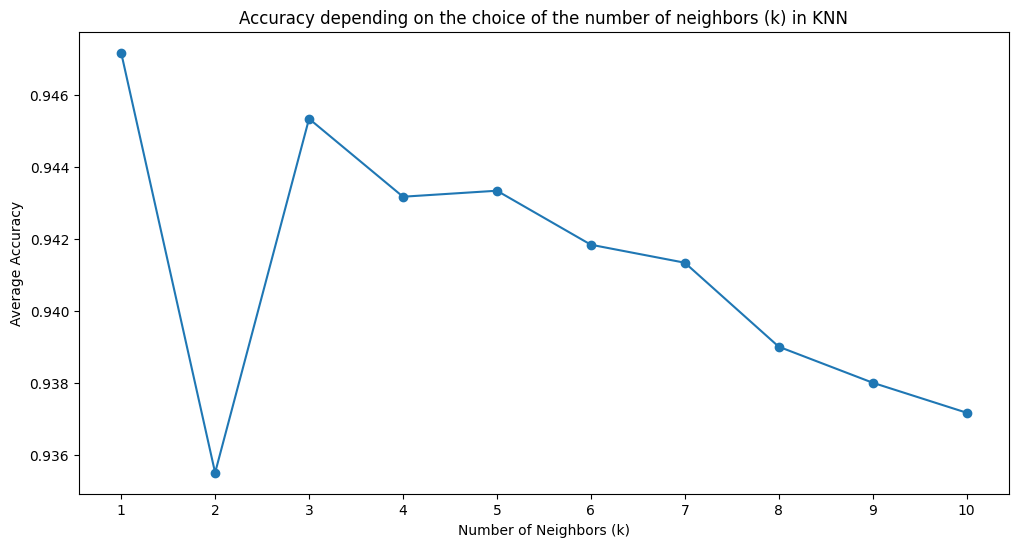

In [5]:
# Plot of accuracy of knn for each k
plt.figure(figsize=(12, 6))
plt.plot(k_values, list(results.values()), marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Accuracy')
plt.title('Accuracy depending on the choice of the number of neighbors (k) in KNN')
plt.xticks(k_values)
plt.show()